### Packages

In [1]:
# necessary class
import pandas as pd

from IPython.display import HTML
from IPython.display import Image
from IPython.display import display

### Objectif

La [recherche d’images basée sur le contenu](https://fr.wikipedia.org/wiki/Recherche_d%27image_par_le_contenu) (CBIR) est une méthode permettant de rechercher des images à partir des caractéristiques visuelles, c’est-à-dire induites des pixels. L’utilisation la plus connue de cette méthode est la fonction de recherche par images du moteur de recherche Google. Elle s’effectue en trois étape :

1. extraction des caractéristiques d’une base de données d’images pour former une base de données des caractéristiques,
2. extraction des caractéristiques de l’image fournie en entrée,
3. trouver les caractéristiques les plus similaires dans la base de données,
4. retourner l’image associée aux caractéristiques trouvées.


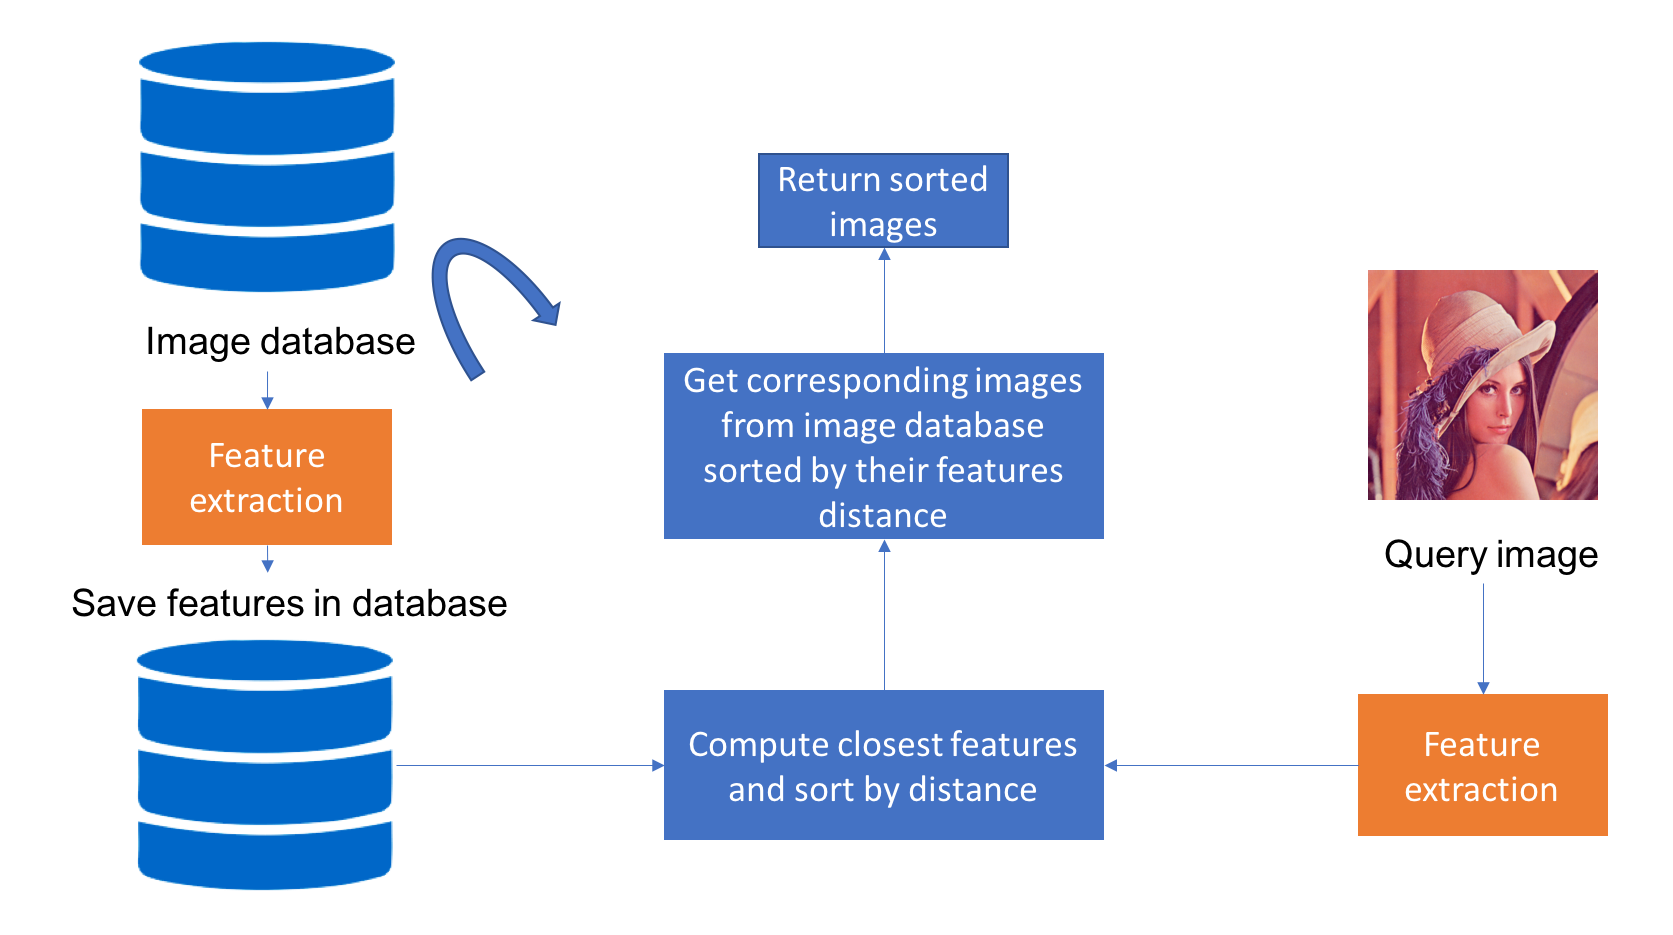

In [2]:
Image("cbir.png")

Cette méthode répose sur l'algorithme d'extraction et la comparaison des caractéristiques.

#### Mesure de similarité
* [Similarité cosinus](https://fr.wikipedia.org/wiki/Similarit%C3%A9_cosinus)
* [Distance de manhattan](https://fr.wikipedia.org/wiki/Distance_de_Manhattan)
* [Distance euclidienne](https://fr.wikipedia.org/wiki/Espace_euclidien)

#### Algorithme d'extraction
* [AKAZE](https://docs.opencv.org/3.4/db/d70/tutorial_akaze_matching.html)
* [ORB](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_orb/py_orb.html)
* [SURF](https://docs.opencv.org/master/df/dd2/tutorial_py_surf_intro.html)
* [VGG16](https://neurohive.io/en/popular-networks/vgg16/)
* [VGG19](https://iq.opengenus.org/vgg19-architecture/)
* [MobileNet](https://www.quantmetry.com/blog/mobilenet-optimisation-de-la-convolution-pour-les-reseaux-de-neurones-embarques/)
* [Autoencoder](https://en.wikipedia.org/wiki/Autoencoder)

**L'objectif de trouver la bonne combinaisons (algorithme d'extraction & mesure de similarité) qui permet d'avoir des réponses pertinentes.**

### Jeux de données
Nous avons utilisé le jeu de donnée [Apparel](https://www.kaggle.com/trolukovich/apparel-images-dataset) pour notre évaluation.

Elle contient 11385 images réparties en 37 catégories.

### Evaluation

#### Métriques d'évaluation
* Mean Average Precision (MAP) pour mesurer la robustesse du système
* Mean Reciprocal Rank (MRR) pour mesurer la pertinence du premier élément
* Temps de traitement d'une requête

Pour plus de détail [voir](https://web.stanford.edu/class/cs276/handouts/EvaluationNew-handout-1-per.pdf)

In [3]:
score = pd.read_csv('../outputs/evaluation.csv')
score = score[['extractor', 'distance', 'mrr', 'mmap', 'average_time', 'comparison_item']]
score

#### Par couleur

In [6]:
color = score[score.comparison_item == 'color']
color

,extractor,distance,mrr,mmap,average_time,comparison_item
0,AKAZE,cosinus,0.193902,0.188348,0.167108,color
3,AKAZE,manhattan,0.260230,0.366610,0.040977,color
6,AKAZE,euclidean,0.281423,0.370143,0.088371,color
9,ORB,cosinus,0.164134,0.176929,0.148304,color
12,ORB,manhattan,0.272257,0.360776,0.029634,color
15,ORB,euclidean,0.281486,0.348559,0.061018,color
18,SURF,cosinus,0.143928,0.156695,0.154962,color
21,SURF,manhattan,0.297789,0.386045,0.032955,color
24,SURF,euclidean,0.279085,0.336307,0.069818,color
27,VGG16,cosinus,0.138655,0.115788,0.972647,color


#### Par type

In [7]:
style = score[score.comparison_item == 'style']
style

,extractor,distance,mrr,mmap,average_time,comparison_item
1,AKAZE,cosinus,0.057595,0.040006,0.167108,style
4,AKAZE,manhattan,0.159910,0.204142,0.040977,style
7,AKAZE,euclidean,0.164088,0.199789,0.088371,style
10,ORB,cosinus,0.058938,0.037119,0.148304,style
13,ORB,manhattan,0.156594,0.194283,0.029634,style
16,ORB,euclidean,0.158807,0.184653,0.061018,style
19,SURF,cosinus,0.047076,0.034013,0.154962,style
22,SURF,manhattan,0.177961,0.218053,0.032955,style
25,SURF,euclidean,0.152024,0.172916,0.069818,style
28,VGG16,cosinus,0.004384,0.002889,0.972647,style


#### Les deux

In [8]:
both = score[score.comparison_item == 'both']
both

,extractor,distance,mrr,mmap,average_time,comparison_item
2,AKAZE,cosinus,0.057595,0.040006,0.167108,both
5,AKAZE,manhattan,0.159910,0.204142,0.040977,both
8,AKAZE,euclidean,0.164088,0.199789,0.088371,both
11,ORB,cosinus,0.058938,0.037119,0.148304,both
14,ORB,manhattan,0.156594,0.194283,0.029634,both
17,ORB,euclidean,0.158807,0.184653,0.061018,both
20,SURF,cosinus,0.047076,0.034013,0.154962,both
23,SURF,manhattan,0.177961,0.218053,0.032955,both
26,SURF,euclidean,0.152024,0.172916,0.069818,both
29,VGG16,cosinus,0.004384,0.002889,0.972647,both
